In [1]:
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
import pylab 

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [3]:
train = pd.read_csv("treino.csv")

data_columns_names = ['matricula', 'vetorial','lpt','p1','ic','lp1','calculo2','discreta','p2','grafos','fis_classica','lp2','cra','calculo1']
train.columns = data_columns_names

In [4]:
train.head()

,matricula,vetorial,lpt,p1,ic,lp1,calculo2,discreta,p2,grafos,fis_classica,lp2,cra,calculo1
0,0cc3d63edf0b986cb87e345972857e15,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647,8.7
1,0d78246db769dc958ce19fc414050b2a,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724,7.0
2,0f5bb983df06b90337dc2c6301fef3f6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588,8.6
3,1307a4421a67a497cea198e8ccfb97ee,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516,7.8
4,1432d50cf8519694ab992c414d90a130,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747,5.2


In [5]:
matricula = train["matricula"]
features = train.drop(["matricula"], axis=1)

## 1. Data preprocessing

### Checking for missing values in data 

To search for missing values we first apply a function that checks if each value of our data frame is a real number and return true for those who are and false otherwise. In a second moment, we count how Trues and Falses we obtained in the first function. The below table present the numbers and confirm that all values for all features are presented in our data, thus, it is not needed to treat missing values.

In [6]:
features.applymap(np.isreal).apply(pd.value_counts)

,vetorial,lpt,p1,ic,lp1,calculo2,discreta,p2,grafos,fis_classica,lp2,cra,calculo1
True,88,88,88,88,88,88,88,88,88,88,88,88,88


### Checking for skew in data

Using shapiro test, skewness and Q-Qplot

#### Shapiro normality test

In [7]:
features.apply(lambda x: stats.shapiro(x))

vetorial          (0.966356575489, 0.0218723528087)
lpt              (0.957782268524, 0.00592448469251)
p1                (0.947769165039, 0.0014158753911)
ic                 (0.987297177315, 0.551311731339)
lp1              (0.949837744236, 0.00188722135499)
calculo2        (0.867309808731, 2.33750995449e-07)
discreta         (0.955848455429, 0.00445785466582)
p2                (0.967263817787, 0.0252141393721)
grafos             (0.976828217506, 0.116014324129)
fis_classica    (0.892025470734, 2.26830047723e-06)
lp2             (0.806616425514, 2.19361440124e-09)
cra                (0.986866354942, 0.522131383419)
calculo1          (0.970496237278, 0.0420565418899)
dtype: object

#### Skewness

In [8]:
numeric_feats = features.dtypes[features.dtypes != "object"].index

skewness = features[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
print skewness

vetorial        0.100165
lpt            -0.311041
p1             -0.370812
ic             -0.077415
lp1            -0.327050
calculo2        0.530180
discreta        0.346941
p2             -0.445317
grafos          0.066885
fis_classica   -0.564424
lp2            -1.905429
cra            -0.108032
calculo1        0.027946
dtype: float64


#### Q-QPlot

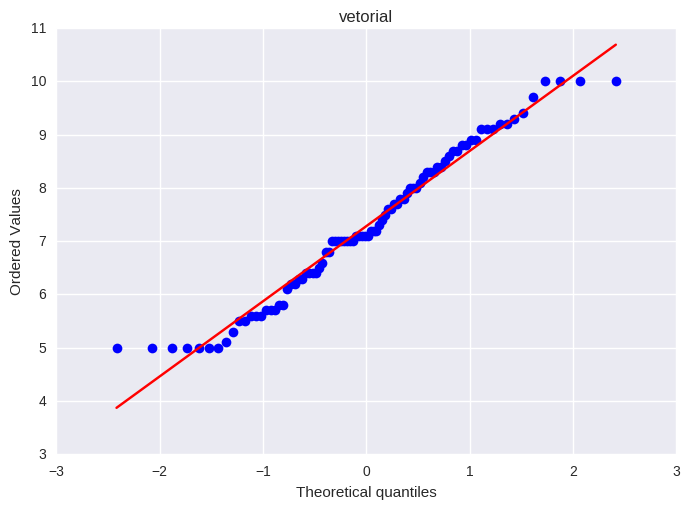

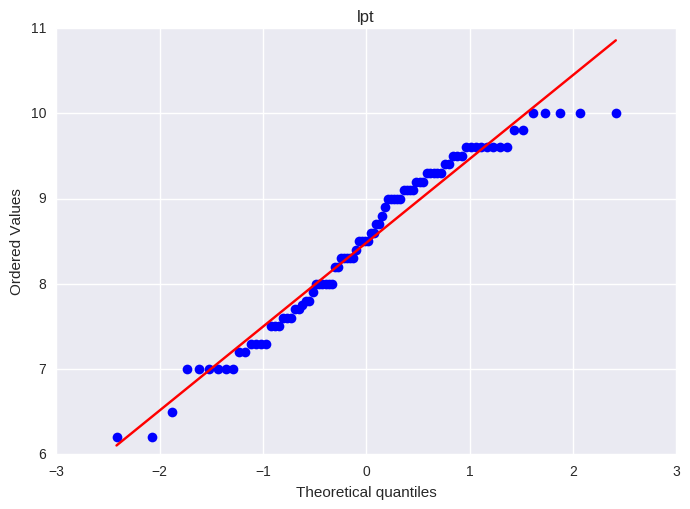

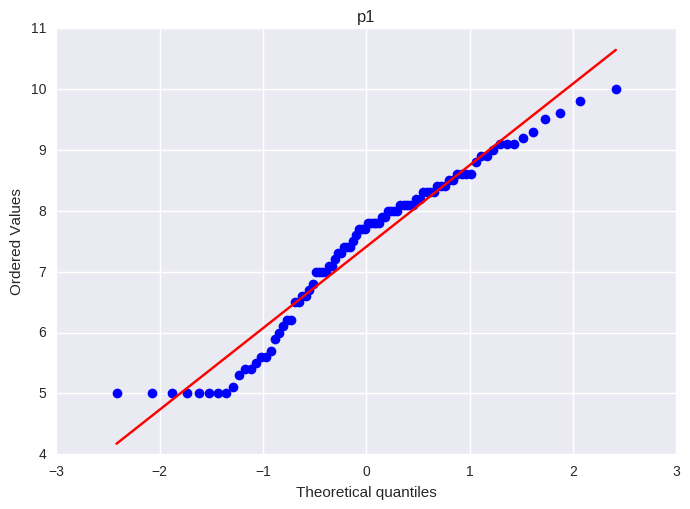

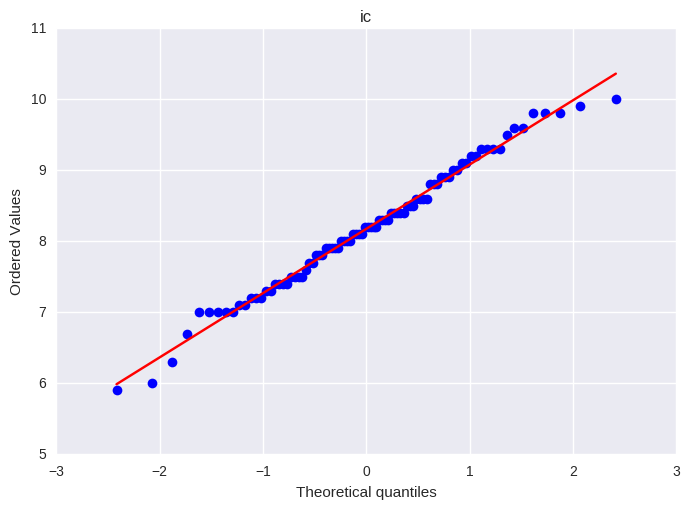

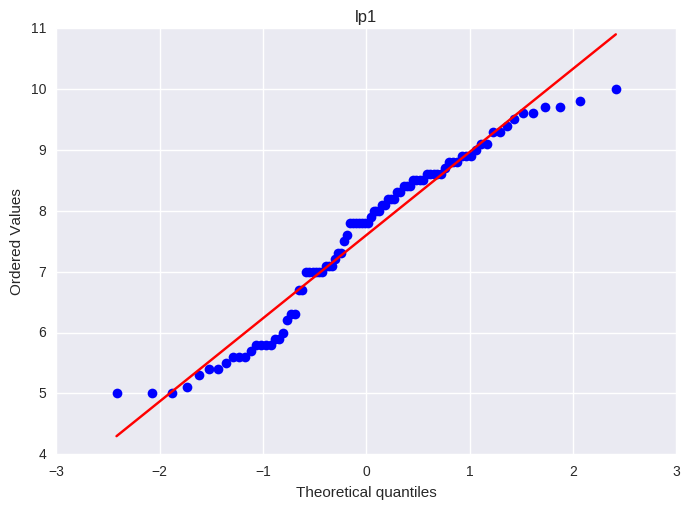

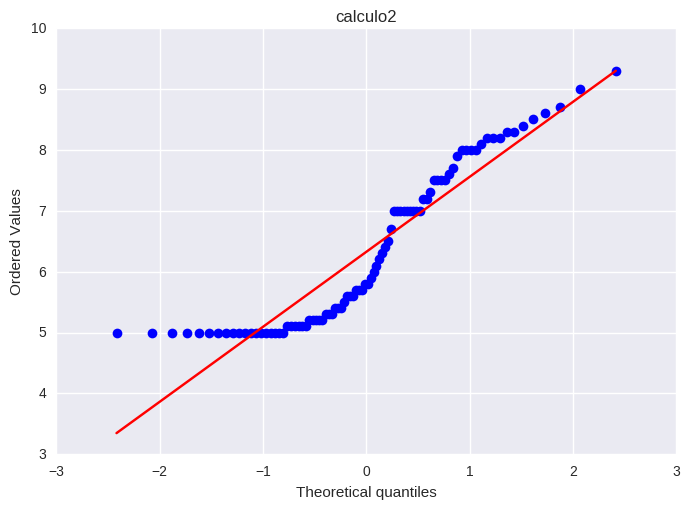

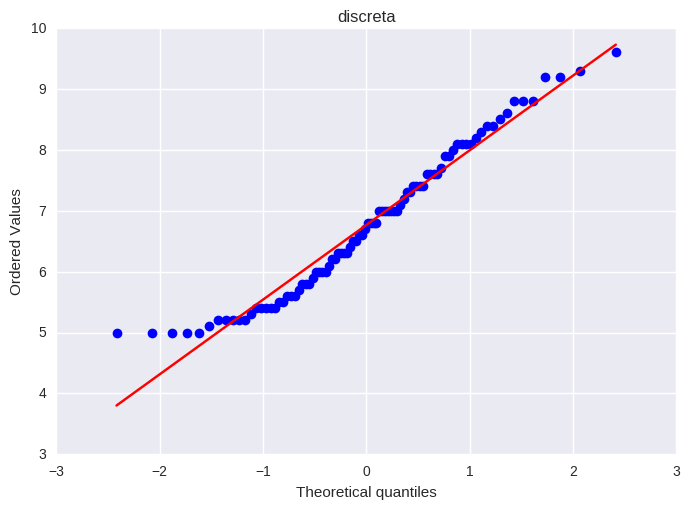

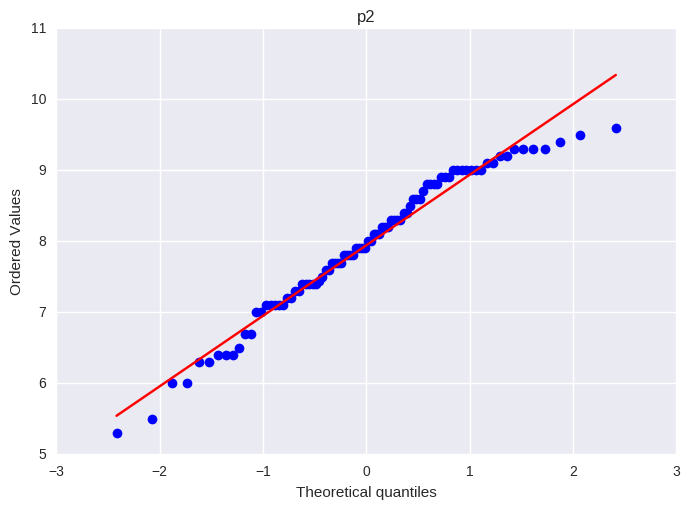

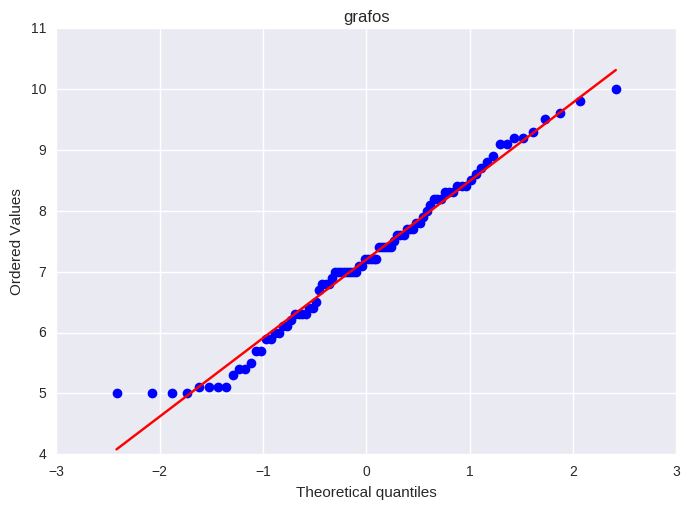

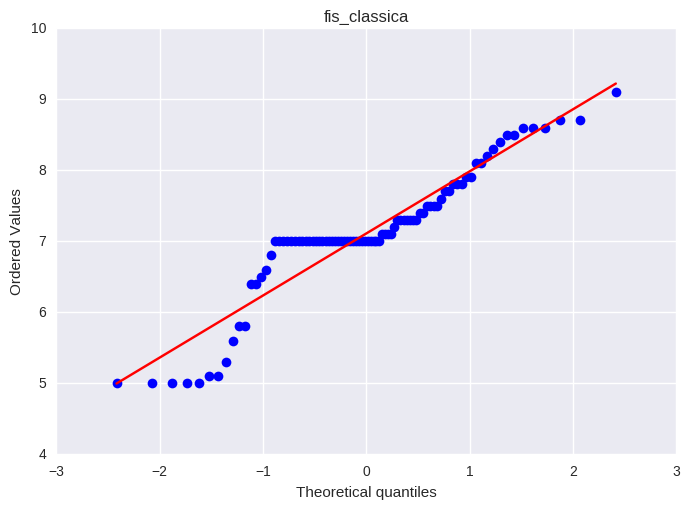

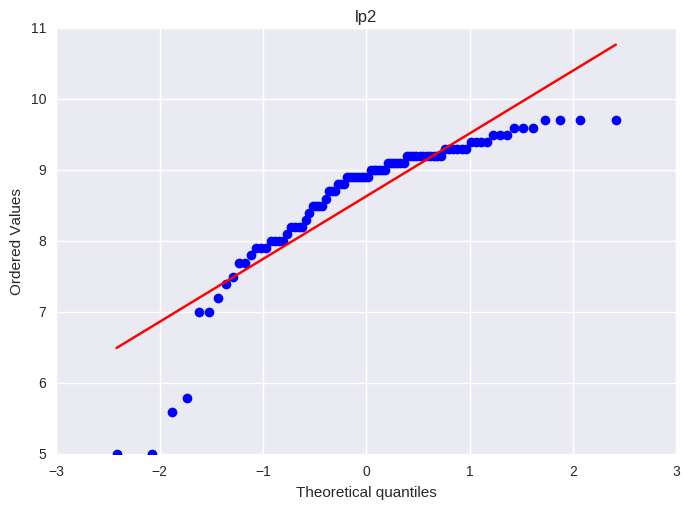

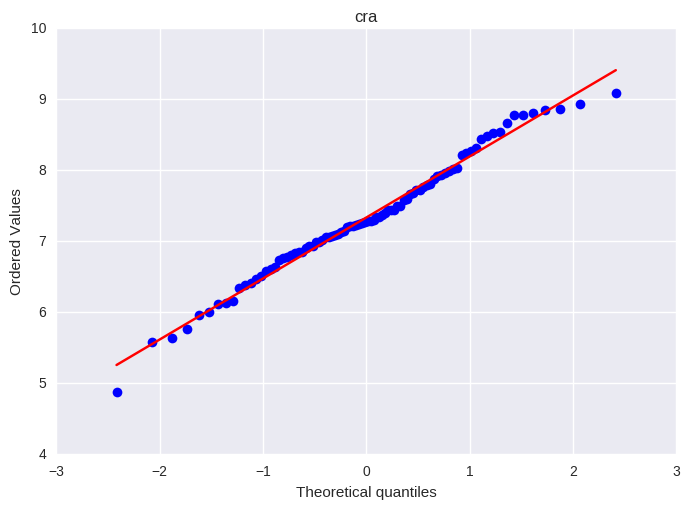

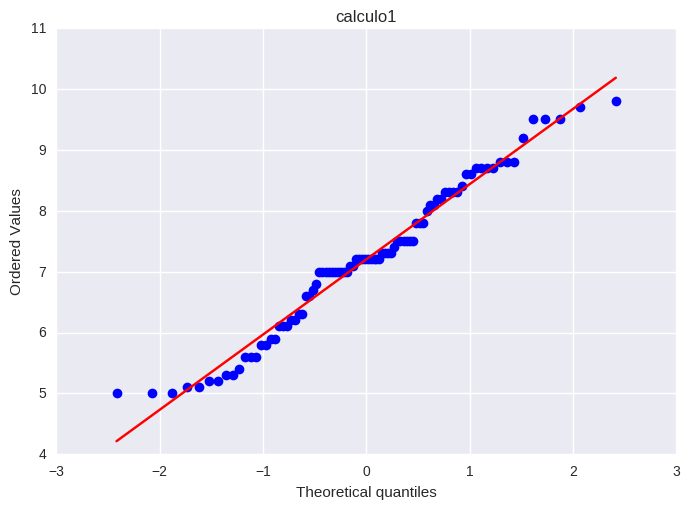

In [9]:
def show_qqplot(x, data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    stats.probplot(data[x], dist="norm", plot=pylab)
    ax.set_title(x)
    pylab.show()
    
for name in features.columns:
    show_qqplot(name, features)

Through our analysis, we conclude that the only feature in the necessity of being transformed is LP2. We conclude it by:
   
    1) Checking for normality in data by knowing that normal data necessarily are not skewed;
    2) Verifying the skewness values for the features; and
    3) Looking at the QQ-Plot for each feature.


### Feature transformation

Now we ease the lp2's skew and show its new values and all metrics previously mentioned.

In [10]:
skewed_feats = skewness[skewness < -0.75]
skewed_feats = skewed_feats.index

features[skewed_feats] = np.exp2(features[skewed_feats])

In [11]:
features.head()

,vetorial,lpt,p1,ic,lp1,calculo2,discreta,p2,grafos,fis_classica,lp2,cra,calculo1
0,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,675.588050,8.477647,8.7
1,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,477.712892,6.851724,7.0
2,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,831.746454,9.090588,8.6
3,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,512.000000,7.283516,7.8
4,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,294.066779,7.205747,5.2


vetorial        0.100165
lpt            -0.311041
p1             -0.370812
ic             -0.077415
lp1            -0.327050
calculo2        0.530180
discreta        0.346941
p2             -0.445317
grafos          0.066885
fis_classica   -0.564424
lp2            -0.240387
cra            -0.108032
calculo1        0.027946
dtype: float64


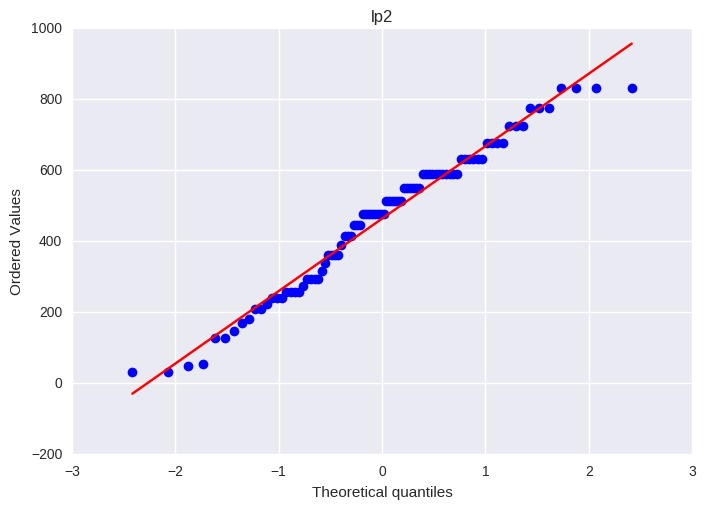

In [12]:
numeric_feats = features.dtypes[features.dtypes != "object"].index
print features[numeric_feats].apply(lambda x: skew(x.dropna()))

show_qqplot("lp2", features)

## 2. Ridge and LASSO Regression

In [13]:
y = features.cra
X_train = features.drop(["cra"], axis=1)


In [14]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def vector_norm(w):
    return np.sqrt(np.sum(w**2))

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

### Ridge Regression

#### No regularization

In [23]:
clf = Ridge(alpha=0)
clf.fit(X_train, y)

print clf.coef_
print clf.intercept_

vector_norm(np.append(clf.coef_, clf.intercept_))

[  7.02016090e-02   6.36304008e-03  -6.13898669e-03   9.91238551e-02
   8.19053551e-03  -4.75582829e-02   1.83856228e-01   2.14211755e-01
   1.87237506e-01   5.77817156e-02  -1.69604017e-04   1.21661842e-02]
1.52931089657


1.5729548999330265

#### With regularization

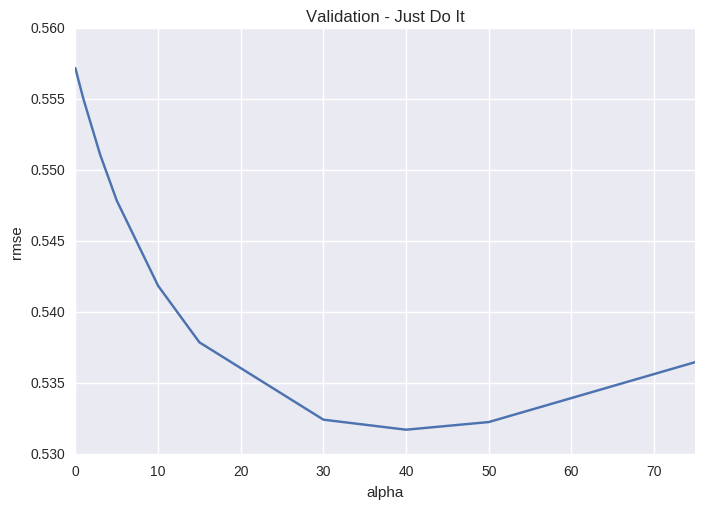

In [16]:
alphas = [0.0, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 40, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")


In [17]:
cv_ridge

0.00     0.557180
0.05     0.557063
0.10     0.556946
0.30     0.556487
1.00     0.554947
3.00     0.551080
5.00     0.547861
10.00    0.541866
15.00    0.537882
30.00    0.532439
40.00    0.531734
50.00    0.532272
75.00    0.536493
dtype: float64

In [21]:
print X_train.columns
print y

Index([u'vetorial', u'lpt', u'p1', u'ic', u'lp1', u'calculo2', u'discreta',
       u'p2', u'grafos', u'fis_classica', u'lp2', u'calculo1'],
      dtype='object')
0     8.477647
1     6.851724
2     9.090588
3     7.283516
4     7.205747
5     7.808235
6     8.858824
7     6.158824
8     6.730588
9     7.079310
10    6.387379
11    6.134513
12    6.834066
13    7.247191
14    6.116279
15    8.522353
16    8.771765
17    8.661176
18    7.010588
19    7.124719
20    7.058621
21    8.772941
22    7.725882
23    6.467033
24    7.083158
25    6.604819
26    7.212414
27    7.994118
28    7.963218
29    8.032184
        ...   
58    7.368539
59    6.634940
60    8.022353
61    7.442529
62    7.501176
63    6.000935
64    7.761176
65    7.684706
66    6.763636
67    6.929167
68    7.869880
69    7.720690
70    7.267470
71    7.250575
72    8.850588
73    6.415842
74    8.802353
75    5.758879
76    7.669231
77    5.581651
78    7.207865
79    6.905263
80    6.931959
81    7.401176
82    6.99550

In [22]:
clf = Ridge(alpha=40)
clf.fit(X_train, y)

print clf.coef_
print clf.intercept_

vector_norm(np.append(clf.coef_, clf.intercept_))

[  8.31138209e-02   4.44961665e-03   1.52428370e-02   7.81902418e-02
   2.74520619e-02  -2.75613994e-02   1.51879876e-01   1.28577767e-01
   1.47447444e-01   4.93629447e-02   1.40837075e-04   2.75989809e-02]
2.17895000253


2.1970773849719158

### LASSO Regression

In [135]:
model_lasso = LassoCV(alphas = alphas).fit(X_train, y)

In [137]:
rmse_cv(model_lasso).min()

0.25833893481109704

In [33]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [35]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 6 variables


In [36]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

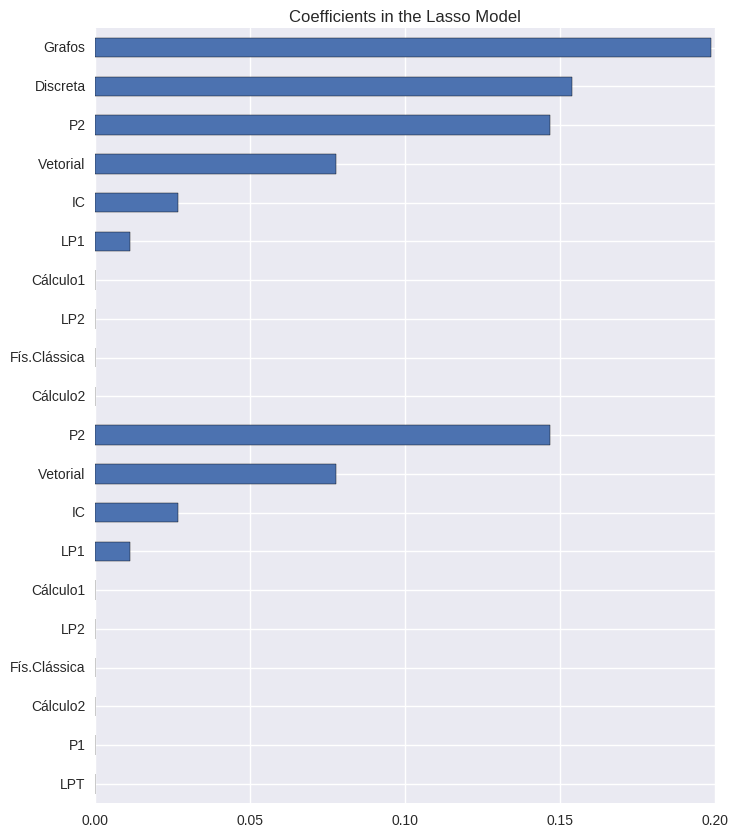

In [38]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

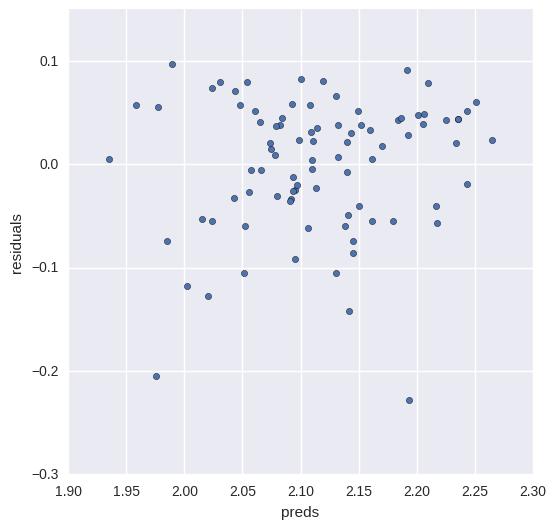

In [39]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")